In [1]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras import models
from keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout,Input
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, Adadelta
from matplotlib.ticker import FormatStrFormatter
from sklearn.metrics import confusion_matrix

##Load_Data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
(x_train_CNN, y_train_CNN) , (x_test_CNN, y_test_CNN) = cifar10.load_data()

In [3]:
def normalize(x_train, x_test):
  x_train = x_train / 255
  x_test = x_test / 255
  return[x_train, x_test]

def flatten(x_train, x_test, y_train, y_test):
  x_train = x_train.reshape([x_train.shape[0], -1])
  x_test  = x_test.reshape([x_test.shape[0], -1])
  x_train = x_train.astype('float32')
  x_test  = x_test.astype('float32')
  
  y_test  = y_test.astype('float32')
  y_train = y_train.astype('float32')
  return[x_train, x_test, y_train, y_test]

def one_hot(y_train, y_test):
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  return[y_train, y_test]

###show_image

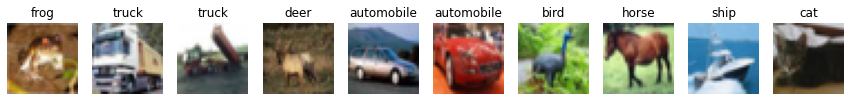

In [4]:

def image_show(data,label):
  fig = plt.figure(figsize = (15, 10))
  for i in range(10):
    fig.add_subplot(1, 10 ,i + 1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(labels_name(label[i]))

def labels_name(index):
  labels_name = {0:'airplane', 1:'automobile',
                2:'bird', 3:'cat',
                4:'deer', 5:'dog',
                6:'frog', 7:'horse',
                8:'ship', 9:'truck'}
  return labels_name.get(index[0])

image_show(x_train, y_train)

##Pre-Proccess on Data 

In [5]:
[x_train, x_test] = normalize(x_train, x_test)
[y_train, y_test] = one_hot(y_train, y_test)
[x_train, x_test, y_train, y_test] = flatten(x_train, x_test, y_train, y_test)
print(x_train.shape)

(50000, 3072)


In [6]:
[x_train_CNN, x_test_CNN] = normalize(x_train_CNN, x_test_CNN)
[y_train_CNN, y_test_CNN] = one_hot(y_train_CNN, y_test_CNN)
#[x_train_CNN, x_test_CNN, y_train_CNN, y_test_CNN] = flatten(x_train_CNN, x_test_CNN, y_train_CNN, y_test_CNN)
print(x_train.shape)

(50000, 3072)


##MLP

In [7]:
def my_perceptron_model(input_shape, activation=''):
  X_input = Input(input_shape)
  if activation != '':
    X=Dense(256, activation=activation)(X_input)
    X=Dense(256, activation=activation)(X)
    X=Dense(256, activation=activation)(X)
  else:
    X=Dense(256, activation=activation)(X_input)
    X=Dense(256, activation=activation)(X)
    X=Dense(256, activation=activation)(X)
  X=Dense(10, activation='softmax')
  model = models.Model(inputs = X_input, outputs = X)
  return model

def Compile(model, loss='', optimizer=''):
    if loss != '' or optimizer != '':
      if loss != '':
        model.compile(loss=loss, metrics=['accuracy'])
      if optimizer != '':
        model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    else:
      model.compile(loss='mse', metrics=['accuracy'])



In [10]:
def Plot_Accuracy(history, hyper, name):
  fig, axs = plt.subplots(ncols=2, nrows=len(history), figsize=(9, 10))
  if len(history) == 1:
    axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
    axs[0].plot(history[0].history['loss'])
    axs[0].plot(history[0].history['val_loss'])
    #axs[0].set_title(f'{name} is {hyper[0]}')
    axs[0].set_ylabel('loss')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'validation'], loc='upper left')
    axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
    axs[1].plot(history[0].history['accuracy'])
    axs[1].plot(history[0].history['val_accuracy'])
    #axs[1].set_title(f'{name} is {hyper[0]}')
    axs[1].set_ylabel('accuracy')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'validation'], loc='upper left')
  else:
    for i in range(len(history)):
      axs[i, 0].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
      axs[i, 0].plot(history[i].history['loss'])
      axs[i, 0].plot(history[i].history['val_loss'])
      #axs[i, 0].set_title(f'{name} is {hyper[i]}')
      axs[i, 0].set_ylabel('loss')
      axs[i, 0].set_xlabel('epoch')
      axs[i, 0].legend(['train', 'validation'], loc='upper left')
      axs[i, 1].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
      axs[i, 1].plot(history[i].history['accuracy'])
      axs[i, 1].plot(history[i].history['val_accuracy'])
      #axs[i, 1].set_title(f'{name} is {hyper[i]}')
      axs[i, 1].set_ylabel('accuracy')
      axs[i, 1].set_xlabel('epoch')
      axs[i, 1].legend(['train', 'validation'], loc='upper left')
  fig.tight_layout()
  plt.show()

##Best Optimizer

313/313 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.3968


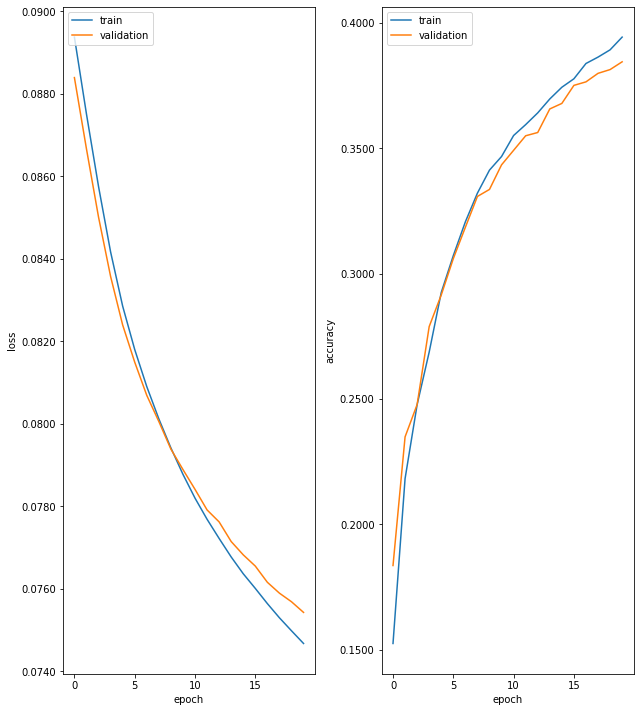

Test data accuracy is 0.3968000113964081
Test data loss is 0.07481177151203156


In [11]:
opt = SGD(learning_rate=0.01)
scores = []
losses = []
history = []

X_input = Input(3072)
X=Dense(256, activation='relu')(X_input)
X=Dense(256, activation='relu')(X)
X=Dense(256, activation='relu')(X)
X=Dense(10, activation='softmax')(X)
model = models.Model(inputs = X_input, outputs = X)
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
history.append(model.fit(x_train, y_train, epochs=20, batch_size=32,
                      validation_split=0.2, verbose=0))
acloss =model.evaluate(x_test, y_test, batch_size=32)
losses.append(acloss[0])
scores.append(acloss[1])
Plot_Accuracy(history, opt, 'optimizer')

print(f'Test data accuracy is {max(scores)}')
print(f'Test data loss is {losses[scores.index(max(scores))]}')

In [13]:
from sklearn.metrics import confusion_matrix

def Convert_To_Label(y):
  y_new = []
  for i in range(len(y)):
    y_new.append(y[i].argmax() + 1)
  return y_new


In [14]:
confusion_matrix(Convert_To_Label(y_test), Convert_To_Label(model.predict(x_test)))

313/313 [==============================] - 1s 2ms/step


array([[428,  40,  49,  13,  27,  18,  30,  84, 237,  74],
       [ 42, 447,   9,  26,  14,  53,  65,  42, 108, 194],
       [113,  37, 216,  41, 166,  95, 166,  85,  58,  23],
       [ 35,  59,  81, 167,  56, 231, 147, 116,  43,  65],
       [ 51,  23, 127,  36, 312,  68, 203, 118,  42,  20],
       [ 18,  30,  93,  94,  76, 360, 141, 112,  50,  26],
       [  8,  40,  88,  47, 105,  86, 502,  60,  20,  44],
       [ 24,  57,  40,  33, 111,  82,  65, 472,  37,  79],
       [107,  85,  13,  18,  10,  50,  13,  40, 568,  96],
       [ 39, 155,  17,  23,  13,  24,  52,  68, 113, 496]])